In [21]:
import numpy as np
import matplotlib.pyplot as plt

In [22]:
# A = counts(data == A)
# B = counts(data == B)
# # Class prior for A
# pi_A     = A / (A + B)
# # P(X|A):
# p_X_a    = 0.7 <-- based on empirical knowledge.
# muA      = mean(A)
# sigmaA   = stdev(A)
# p_X_a    = pdf(data==A, muA, sigmaA)
# # P(A)
# P_A      = (pi_A * p_X_a) / (pi_B * p_X_b)

# calculate P(A|B) given P(A), P(B|A), P(B|not A)
def bayes_theorem(p_a, p_b_given_a, p_b_given_not_a):
	# calculate P(not A)
	not_a = 1 - p_a
	# calculate P(B)
	p_b = p_b_given_a * p_a + p_b_given_not_a * not_a
	# calculate P(A|B)
	p_a_given_b = (p_b_given_a * p_a) / p_b
	return p_a_given_b

# P(A)
p_a = 0.0002
# P(B|A)
p_b_given_a = 0.85
# P(B|not A)
p_b_given_not_a = 0.05
# calculate P(A|B)
result = bayes_theorem(p_a, p_b_given_a, p_b_given_not_a)
# summarize
print('P(A|B) = %.3f%%' % (result * 100))

P(A|B) = 0.339%


In [23]:
# Mean Squared Error.
def MSE(y_data, y_pred):
    """
    Args:
        y_data (array): Input measurements or raw data.
        y_pred (array): Trained values.

    Returns:
        mse: Float, like a score that is useful for evaluating trained values
    """
    # Check if the length of two arrays are the same.
    assert len(y_data) is len(y_pred), "The length of two arrays must be the same."
    # Error recording.
    err = []
    for y1, y2 in zip(y_data, y_pred):
        # Squared error.
        err.append((y1-y2)**2)
    
    # Make average.
    mse = sum(err)/len(err)
    
    return mse

In [24]:
# Test for function "MSE".
# Artifical data.
y_data = [1,4,2,3,6,1,3]
y_pred = [2,3,4,6,3,5,2]
# Result.
MSE(y_data, y_pred)

5.857142857142857

In [44]:
# Gradient descent
def GD(x_data, y_data, alpha, beta_init, steps):
    """
    Args:
        x_data (array): Statistical weights for individual data.
        y_data (array): Input measurements or raw data.
        y_pred (array): Trained values.
        alpha (float, 0~1): Learning rate.
        beta_init (float): Initial value. (learning curve)
        
    Returns:
        beta: Float, learning outputs.
    """
    
    records = [beta_init]
    beta = beta_init
    for step in range(steps):
        dB = []
        for xd, yp, yd in zip(x_data, y_pred, y_data):
            dB.append(xd*(yp-yd))
        dB_grad = sum(dB)/len(dB)
        beta = beta - alpha*dB_grad
        records.append(beta)
    
    fig = plt.figure(figsize=(8,5))
    ax = fig.add_subplot(111)
    ax.plot(records)
    
    return beta

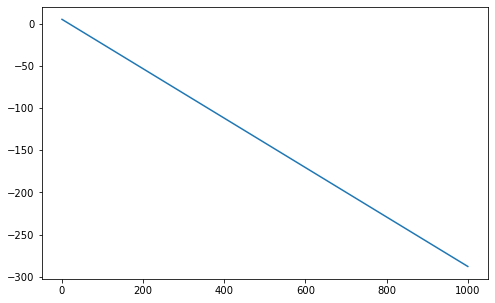

In [45]:
# Set the learning rate to be a small number
alpha    = 0.05
# Initial value for beta.
beta_init = 5
# Steps for finding minimum beta.
steps = 1000
# Artifical data.
x_data = [1,1,1,1,1,1,1]
y_data = [1,4,2,3,6,1,3]
y_pred = [2,3,4,6,3,5,2]
# Update beta based on dB
beta = GD(x_data, y_data, alpha, beta_init, steps)

In [68]:
# trainTestSplit
# Assume X and Y have same number of samples in the row space
# X        = predictors
# Y        = response
def trainTestSplit(X, Y, subset_size=0.8):
    # Get vector of indicies
    idx = np.arange(X.shape[0])
    # Randomly sample a subset of the indices. I will do 80% of the data.
    np.random.shuffle(idx)
    trainIdx = idx[:int(len(idx)*subset_size)]
    testIdx = idx[int(len(idx)*subset_size):]
    # Using these shuffled indicies, get the dataset.
    Xtrain = X[trainIdx, :]
    Ytrain = Y[trainIdx, :]
    Xtest = X[testIdx, :]
    Ytest = Y[testIdx, :]
    
    return Xtrain, Ytrain, Xtest, Ytest

In [69]:
X = np.random.rand(10,5)
Y = np.random.rand(10,5)
res = trainTestSplit(X, Y, subset_size=0.8)
print('Shape of Xtrain:', res[0].shape)
print('Shape of Ytrain:', res[1].shape)
print('Shape of Xtest:', res[2].shape)
print('Shape of Ytest:', res[3].shape)

Shape of Xtrain: (8, 5)
Shape of Ytrain: (8, 5)
Shape of Xtest: (2, 5)
Shape of Ytest: (2, 5)


In [126]:
# Linear regression.
class LinearRegression:
    
    def __init__(self, X, Y, subset_size=0.8, alpha=0.05, epochs=500):
        # Initialize data
        self.beta = np.random.rand()
        self.intercept = np.random.rand()
        self.alpha = alpha
        self.epochs = epochs
        self.mse = np.zeros(epochs)
        self._dataset = self.trainTestSplit(X, Y, subset_size)
    
    @property
    def dataset(self):
        return self._dataset
        
    def trainTestSplit(self, X, Y, subset_size):
        # Get vector of indicies
        idx = np.arange(X.shape[0])
        # Randomly sample a subset of the indices. I will do 80% of the data.
        np.random.shuffle(idx)
        trainIdx = idx[:int(len(idx)*subset_size)]
        testIdx = idx[int(len(idx)*subset_size):]
        # Using these shuffled indicies, get the dataset.
        Xtrain = X[trainIdx, :]
        Ytrain = Y[trainIdx, :]
        Xtest = X[testIdx, :]
        Ytest = Y[testIdx, :]
        # Updata dataset in class property.
        return {'Xtrain':Xtrain, 'Ytrain':Ytrain, 'Xtest':Xtest, 'Ytest':Ytest}

    def RegressionLearning(self):
        
        # Linear regression function
        def lm(self, X, beta, intercept):
            yhat = X * beta + intercept
            return yhat
        
        # Learning with regression
        for i in self.epochs:
            ypred= lm(self.dataset['Xtrain'], self.beta, self.intercept)
            self.mse[i] = np.mean([(y1-y2)**2 for y1, y2 in zip(ypred, self.dataset['Ytrain'])])
            dB = self.dataset['Xtrain'] * (ypred - self.dataset['Ytrain'])
            # Update...
            self.beta = self.beta - self.alpha*dB
            self.intercept = self.intercept - self.alpha*dB

    def Prediction(self):
        # Predict using model
        final_ypred = self.dataset['Xtest'] * self.beta + self.intercept
        # Evaluate model
        r = np.corrcoef(final_ypred, self.dataset['Ytest'])
        r2 = r**2
        mse = np.mean([(y1-y2)**2 for y1, y2 in zip(final_ypred, self.dataset['Ytest'])])
        return {"r-value":r, "r2-value":r2, "MSE":mse}

In [127]:
L = LinearRegression(X, Y, subset_size=0.8)
res = L.Prediction()

In [131]:
res['MSE']

0.33047270212941393